In [6]:
import os, shutil
origanal_dataset_path = 'D:/test projects and codes\Data_Sets\Cat_vs_Dog_25k'
small_dataset_dir = '../Data_Sets/Cat_vs_Dog_small-'# store small dataset from big one
#os.mkdir(small_dataset_dir)

train_dir = os.path.join(small_dataset_dir,'train') # training directory 
#os.mkdir(train_dir)

val_dir = os.path.join(small_dataset_dir, 'validation')# validation directory
#os.mkdir(val_dir)

test_dir = os.path.join(small_dataset_dir, 'test')#testing  directory
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
#os.mkdir(train_dogs_dir)

val_cats_dir = os.path.join(val_dir,'cats')
#os.mkdir(val_cats_dir)

val_dogs_dir = os.path.join(val_dir,'dogs')
#os.mkdir(val_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
'''os.mkdir(test_dogs_dir)
###cats copy in dirs
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(origanal_dataset_path,fname)
    dst = os.path.join(train_cats_dir, fname)
    src = src.replace("\\", "/" )
    dst = dst.replace("\\","/")
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(origanal_dataset_path,fname)
    dst = os.path.join(val_cats_dir, fname)
    src = src.replace("\\", "/" )
    dst = dst.replace("\\","/")
    shutil.copyfile(src,dst)    

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(origanal_dataset_path,fname)
    dst = os.path.join(test_cats_dir, fname)
    src = src.replace("\\", "/" )
    dst = dst.replace("\\","/")
    shutil.copyfile(src,dst)
###dogs copy in dirs    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(origanal_dataset_path,fname)
    dst = os.path.join(train_dogs_dir, fname)
    src = src.replace("\\", "/" )
    dst = dst.replace("\\","/")
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(origanal_dataset_path,fname)
    dst = os.path.join(val_dogs_dir, fname)
    src = src.replace("\\", "/" )
    dst = dst.replace("\\","/")
    shutil.copyfile(src,dst)    

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(origanal_dataset_path,fname)
    dst = os.path.join(test_dogs_dir, fname)
    src = src.replace("\\", "/" )
    dst = dst.replace("\\","/")
    shutil.copyfile(src,dst)
    
'''

'os.mkdir(test_dogs_dir)\n###cats copy in dirs\nfnames = [\'cat.{}.jpg\'.format(i) for i in range(1000)]\nfor fname in fnames:\n    src = os.path.join(origanal_dataset_path,fname)\n    dst = os.path.join(train_cats_dir, fname)\n    src = src.replace("\\", "/" )\n    dst = dst.replace("\\","/")\n    shutil.copyfile(src,dst)\n\nfnames = [\'cat.{}.jpg\'.format(i) for i in range(1000, 1500)]\nfor fname in fnames:\n    src = os.path.join(origanal_dataset_path,fname)\n    dst = os.path.join(val_cats_dir, fname)\n    src = src.replace("\\", "/" )\n    dst = dst.replace("\\","/")\n    shutil.copyfile(src,dst)    \n\nfnames = [\'cat.{}.jpg\'.format(i) for i in range(1500, 2000)]\nfor fname in fnames:\n    src = os.path.join(origanal_dataset_path,fname)\n    dst = os.path.join(test_cats_dir, fname)\n    src = src.replace("\\", "/" )\n    dst = dst.replace("\\","/")\n    shutil.copyfile(src,dst)\n###dogs copy in dirs    \nfnames = [\'dog.{}.jpg\'.format(i) for i in range(1000)]\nfor fname in fnam

In [8]:
#printing and testing data splits
import os, shutil
print('training cats images:' ,len(os.listdir(train_cats_dir)))
print('training Dogs images:' ,len(os.listdir(train_dogs_dir)))
print('validation cats images:', len(os.listdir(val_cats_dir)))
print('validation dogs images:' ,len(os.listdir(val_dogs_dir)))
print('test cats images:', len(os.listdir(test_cats_dir)))
print('test dogs images:', len(os.listdir(test_dogs_dir)))

training cats images: 1000
training Dogs images: 1000
validation cats images: 500
validation dogs images: 500
test cats images: 500
test dogs images: 500




# Model Genration and Traning

In [9]:

from keras import layers
from keras import models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

#complie
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])



Using TensorFlow backend.


In [26]:
from keras.preprocessing.image import ImageDataGenerator
train_datgen = ImageDataGenerator(rescale=1./255)
test_datgen = ImageDataGenerator(rescale=1./255)

train_datgenerator = train_datgen.flow_from_directory(train_dir,
                                                      target_size=(150,150),
                                                      batch_size=20,
                                                      class_mode ='binary')
val_datgenerator = test_datgen.flow_from_directory(val_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode ='binary')

history = model.fit_generator(train_datgenerator,
                             steps_per_epoch=100,
                              epochs =30,
                             validation_data=val_datgenerator,
                             validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 203s 2s/step - loss: 0.6897 - acc: 0.5385 - val_loss: 0.6833 - val_acc: 0.5500
Epoch 2/30
100/100 [==============================] - 202s 2s/step - loss: 0.6542 - acc: 0.6115 - val_loss: 0.6508 - val_acc: 0.6050
Epoch 3/30
100/100 [==============================] - 201s 2s/step - loss: 0.6070 - acc: 0.6740 - val_loss: 0.6898 - val_acc: 0.5960
Epoch 4/30
100/100 [==============================] - 200s 2s/step - loss: 0.5704 - acc: 0.7025 - val_loss: 0.6006 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 202s 2s/step - loss: 0.5404 - acc: 0.7245 - val_loss: 0.6162 - val_acc: 0.6580
Epoch 6/30
100/100 [==============================] - 203s 2s/step - loss: 0.5122 - acc: 0.7455 - val_loss: 0.5858 - val_acc: 0.6680
Epoch 7/30
100/100 [==============================] - 202s 2s/step - loss: 0.4838 - acc: 0.7705 - val_loss: 0.6001 - v

In [27]:
model.save('cats_and_dog_small1.h5')

# ploting the graph b/w acc and loss

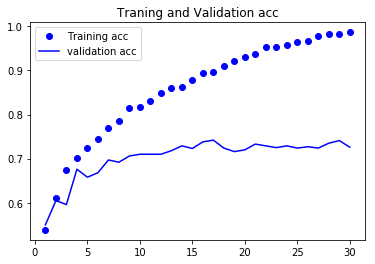

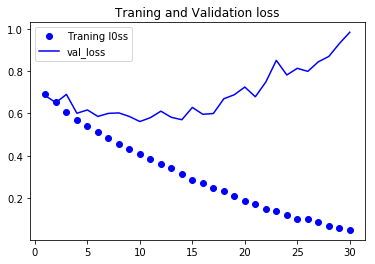

In [31]:
import matplotlib.pyplot as plt
acc= history.history['acc']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
loss =history.history['loss']

epochs= range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Traning and Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label ='Traning l0ss')
plt.plot(epochs,val_loss,'b',label ='val_loss' )
plt.title('Traning and Validation loss')

plt.legend()

plt.show()

# Model Traning with Data Agumentation 

In [32]:
from keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')


# Displayiing randomly agumented any Image

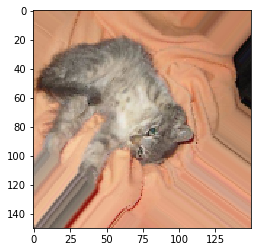

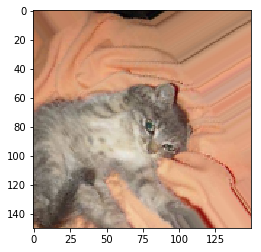

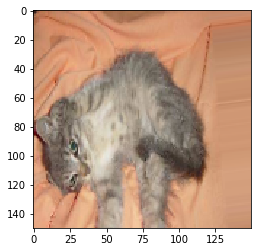

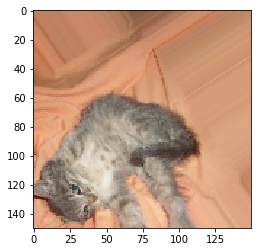

In [33]:
from keras.preprocessing import image

fname = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path = fname[17]

img = image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x= x.reshape((1,)+ x.shape)
i=0
for batch in data_gen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i%4==0:
        break
plt.show()

In [41]:
# model with  data agumentation and dropout layer

from keras import layers
from keras import models, optimizers

modelx = models.Sequential()
modelx.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
modelx.add(layers.MaxPooling2D((2,2)))
modelx.add(layers.Conv2D(64,(3,3), activation ='relu'))
modelx.add(layers.MaxPooling2D((2,2)))
modelx.add(layers.Conv2D(128,(3,3), activation ='relu'))
modelx.add(layers.MaxPooling2D((2,2)))
modelx.add(layers.Conv2D(128,(3,3), activation ='relu'))
modelx.add(layers.MaxPooling2D((2,2)))
modelx.add(layers.Flatten())
modelx.add(layers.Dropout(0.5))
modelx.add(layers.Dense(512, activation = 'relu'))
modelx.add(layers.Dense(1, activation = 'sigmoid'))

#complie
modelx.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [42]:
train_datgen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 )
test_datgen = ImageDataGenerator(rescale=1./255)
val_datgenerator = test_datgen.flow_from_directory(val_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode ='binary')

train_generator = train_datgen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode ='binary')
historyx = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 50,
                             validation_data = val_datgenerator,
                             validation_steps=50)

Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 319s 3s/step - loss: 0.5445 - acc: 0.7169 - val_loss: 0.5197 - val_acc: 0.7320
Epoch 2/50
100/100 [==============================] - 313s 3s/step - loss: 0.5415 - acc: 0.7266 - val_loss: 0.5292 - val_acc: 0.7400
Epoch 3/50
100/100 [==============================] - 311s 3s/step - loss: 0.5294 - acc: 0.7381 - val_loss: 0.5100 - val_acc: 0.7520
Epoch 4/50
100/100 [==============================] - 309s 3s/step - loss: 0.5404 - acc: 0.7206 - val_loss: 0.5080 - val_acc: 0.7470
Epoch 5/50
100/100 [==============================] - 309s 3s/step - loss: 0.5177 - acc: 0.7344 - val_loss: 0.5069 - val_acc: 0.7420
Epoch 6/50
100/100 [==============================] - 310s 3s/step - loss: 0.5174 - acc: 0.7425 - val_loss: 0.5917 - val_acc: 0.6930
Epoch 7/50
100/100 [==============================] - 312s 3s/step - loss: 0.5233 - acc: 0.7444 - val_loss: 0.5006 - v

KeyboardInterrupt: 

In [43]:
modelx.save('cats_and_dog_small.h5')

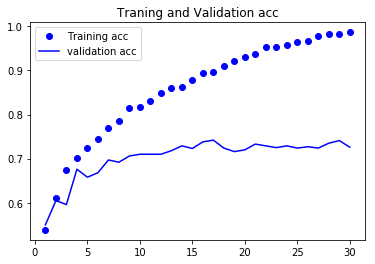

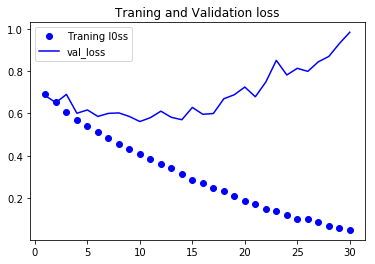

In [45]:
import matplotlib.pyplot as plt
acc= history.history['acc']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
loss =history.history['loss']

epochs= range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Traning and Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label ='Traning l0ss')
plt.plot(epochs,val_loss,'b',label ='val_loss' )
plt.title('Traning and Validation loss')

plt.legend()

plt.show()

# Model Trining using Pretrained Network(vgg16)


In [60]:
from keras.applications import VGG16
import os
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator

#VGG16 Conv base
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape =(150,150,3))
conv_base.summary()

batch_size= 20

def extract_features(directory, sample_count):
    features = np.zeros(shape =(sample_count,4,4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = data_gen.flow_from_directory(directory,
                                             target_size=(150,150),
                                             batch_size=20,
                                             class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i* batch_size: (i+1)*batch_size] = features_batch
        labels[i* batch_size: (i+1)*batch_size] = labels_batch
        i+=1
        if i *batch_size >=sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(val_dir,1000)
test_features, test_labels = extract_features(test_dir,1000)

train_features = np.reshape(train_features, (2000,4*4*512))
validation_features = np.reshape(validation_features, (1000,4*4*512))
test_features = np.reshape(test_features, (1000,4*4*512))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [ ]:
model2=models.Sequential()
model2.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

history2 = model2.fit(train_features,
                     train_labels,
                     epochs = 30,
                     batch_size = 20,
                     validation_data =(validation_features, validation_labels))


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 8s 4ms/step - loss: 4.9591 - acc: 0.5705 - val_loss: 1.9788 - val_acc: 0.7550
Epoch 2/30
2000/2000 [==============================] - 6s 3ms/step - loss: 3.0887 - acc: 0.7220 - val_loss: 1.3422 - val_acc: 0.8370
Epoch 3/30
2000/2000 [==============================] - 6s 3ms/step - loss: 2.1792 - acc: 0.8040 - val_loss: 1.2239 - val_acc: 0.8620
Epoch 4/30
2000/2000 [==============================] - 6s 3ms/step - loss: 1.8497 - acc: 0.8205 - val_loss: 1.1039 - val_acc: 0.8720
Epoch 5/30
2000/2000 [==============================] - 6s 3ms/step - loss: 1.5070 - acc: 0.8500 - val_loss: 1.1205 - val_acc: 0.8700
Epoch 6/30
2000/2000 [==============================] - 6s 3ms/step - loss: 1.4414 - acc: 0.8560 - val_loss: 1.0531 - val_acc: 0.8770
Epoch 7/30
2000/2000 [==============================] - 6s 3ms/step - loss: 1.1198 - acc: 0.8885 - val_loss: 1.0363 - val_acc: 0.8790
Epoch 8/30
200

In [1]:
import matplotlib.pyplot as plt
acc= history2.history['acc']
val_acc = history2.history['val_acc']
val_loss = history2.history['val_loss']
loss =history2.history['loss']

epochs= range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Traning and Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label ='Traning l0ss')
plt.plot(epochs,val_loss,'b',label ='val_loss' )
plt.title('Traning and Validation loss')

plt.legend()

plt.show()

NameError: name 'history2' is not defined

In [15]:
new_model = model.load_weights('cats_and_dog_small1.h5')
new_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

AttributeError: 'NoneType' object has no attribute 'compile'